In [2]:
import pandas as pd 
from taxipred.utils.constants import TAXI_CSV_PATH

df = pd.read_csv(TAXI_CSV_PATH)
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [41]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [42]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [43]:
df.shape

(1000, 11)

<function matplotlib.pyplot.show(close=None, block=None)>

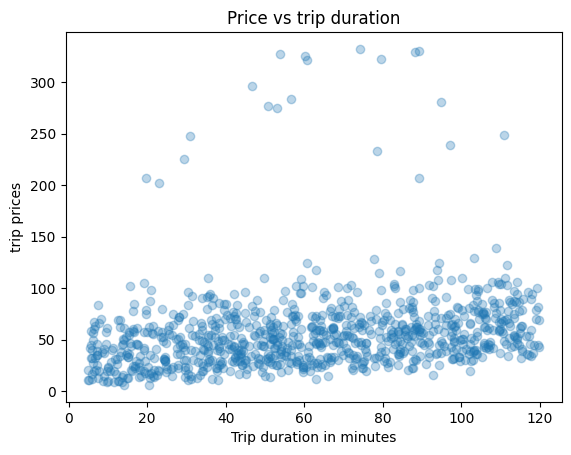

In [49]:
import matplotlib.pyplot as plt 


plt.scatter(df["Trip_Duration_Minutes"], df["Trip_Price"],alpha=0.3)
plt.xlabel("Trip duration in minutes")
plt.ylabel("trip prices")
plt.title("Price vs trip duration")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

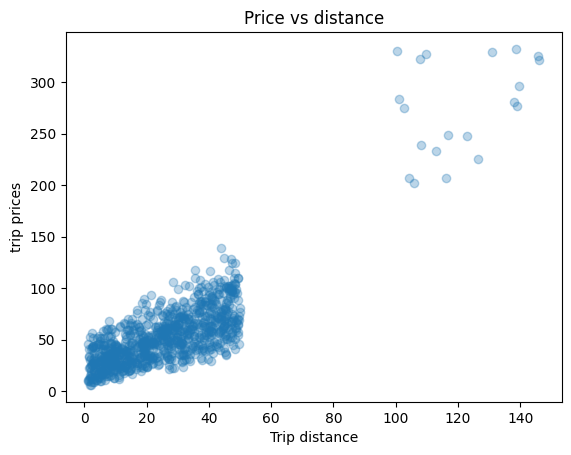

In [58]:

plt.scatter(df["Trip_Distance_km"], df["Trip_Price"],alpha=0.3)
plt.xlabel("Trip distance")
plt.ylabel("trip prices")
plt.title("Price vs distance")
plt.show

In [ ]:
df.isnull().sum(axis=1).value_counts() 

0    562
1    341
2     83
3     14
Name: count, dtype: int64

In [62]:
print("Before cleaning:", len(df))

df_clean = df[(df["Trip_Price"] > 0) & (df["Trip_Duration_Minutes"] >0) & (df["Trip_Distance_km"])].copy()

print("After cleaning:", len(df_clean))
print("Rows removed:", len(df) - len(df_clean))

Before cleaning: 1000
After cleaning: 858
Rows removed: 142


In [65]:
df_clean.isnull().sum(axis=1).value_counts()

0    562
1    253
2     40
3      3
Name: count, dtype: int64

In [69]:
print(df_clean.isnull().sum())

Trip_Distance_km          0
Time_of_Day              45
Day_of_Week              41
Passenger_Count          41
Traffic_Conditions       46
Weather                  43
Base_Fare                39
Per_Km_Rate              41
Per_Minute_Rate          46
Trip_Duration_Minutes     0
Trip_Price                0
dtype: int64


critical rows like distance, price and trip durations have 0 nulls 

In [81]:
# Fill categorical with most common

cat_cols = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"]

for c in cat_cols: 
    if c in df_clean:
        most_common = df_clean[c].mode()[0]
        df_clean[c] = df_clean[c].fillna(most_common)
        print(f"{c} filled with most common value: {most_common}")


Time_of_Day filled with most common value: Afternoon
Day_of_Week filled with most common value: Weekday
Traffic_Conditions filled with most common value: Low
Weather filled with most common value: Clear


In [82]:
#Fill numeric with median

num_cols = ["Passenger_Count", "Base_Fare", "Per_Km_Rate", "Per_Minute_Rate"]

for c in num_cols:
    if c in df_clean:
        median_val = df_clean[c].median()
        df_clean[c] = df_clean[c].fillna(median_val)
        print(f"{c} filled with median value: {median_val}")

Passenger_Count filled with median value: 2.0
Base_Fare filled with median value: 3.54
Per_Km_Rate filled with median value: 1.22
Per_Minute_Rate filled with median value: 0.29


In [84]:
print(df_clean.isnull().sum())

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
0                        0
dtype: int64


In [86]:
# change column names 
df_clean.columns = df_clean.columns.str.lower()

In [89]:
df_clean.shape

(858, 12)

In [88]:
from pathlib import Path

clean_data_path = Path("../src/taxipred/data/taxi_trip_pricing_clean.csv")
df_clean.to_csv(clean_data_path, index= False)

check = pd.read_csv("../src/taxipred/data/taxi_trip_pricing_clean.csv")
print(check.shape)
check.head()

(858, 12)


,trip_distance_km,time_of_day,day_of_week,passenger_count,traffic_conditions,weather,base_fare,per_km_rate,per_minute_rate,trip_duration_minutes,trip_price,Unnamed: 11
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624,Clear
1,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032,Clear
2,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81,36.4698,Clear
3,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028,Clear
4,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,0.29,5.05,11.2645,Rain
